
Lambda School Data Science

*Unit 2, Sprint 3, Module 4*

---

# Model Interpretation

You will use your portfolio project dataset for all assignments this sprint.

## Assignment

Complete these tasks for your project, and document your work.

- [ ] Continue to iterate on your project: data cleaning, exploratory visualization, feature engineering, modeling.
- [ ] Make at least 1 partial dependence plot to explain your model.
- [ ] Make at least 1 Shapley force plot to explain an individual prediction.
- [ ] **Share at least 1 visualization (of any type) on Slack!**

If you aren't ready to make these plots with your own dataset, you can practice these objectives with any dataset you've worked with previously. Example solutions are available for Partial Dependence Plots with the Tanzania Waterpumps dataset, and Shapley force plots with the Titanic dataset. (These datasets are available in the data directory of this repository.)

Please be aware that **multi-class classification** will result in multiple Partial Dependence Plots (one for each class), and multiple sets of Shapley Values (one for each class).

## Stretch Goals

#### Partial Dependence Plots
- [ ] Make multiple PDPs with 1 feature in isolation.
- [ ] Make multiple PDPs with 2 features in interaction. 
- [ ] Use Plotly to make a 3D PDP.
- [ ] Make PDPs with categorical feature(s). Use Ordinal Encoder, outside of a pipeline, to encode your data first. If there is a natural ordering, then take the time to encode it that way, instead of random integers. Then use the encoded data with pdpbox. Get readable category names on your plot, instead of integer category codes.

#### Shap Values
- [ ] Make Shapley force plots to explain at least 4 individual predictions.
    - If your project is Binary Classification, you can do a True Positive, True Negative, False Positive, False Negative.
    - If your project is Regression, you can do a high prediction with low error, a low prediction with low error, a high prediction with high error, and a low prediction with high error.
- [ ] Use Shapley values to display verbal explanations of individual predictions.
- [ ] Use the SHAP library for other visualization types.

The [SHAP repo](https://github.com/slundberg/shap) has examples for many visualization types, including:

- Force Plot, individual predictions
- Force Plot, multiple predictions
- Dependence Plot
- Summary Plot
- Summary Plot, Bar
- Interaction Values
- Decision Plots

We just did the first type during the lesson. The [Kaggle microcourse](https://www.kaggle.com/dansbecker/advanced-uses-of-shap-values) shows two more. Experiment and see what you can learn!

### Links

#### Partial Dependence Plots
- [Kaggle / Dan Becker: Machine Learning Explainability — Partial Dependence Plots](https://www.kaggle.com/dansbecker/partial-plots)
- [Christoph Molnar: Interpretable Machine Learning — Partial Dependence Plots](https://christophm.github.io/interpretable-ml-book/pdp.html) + [animated explanation](https://twitter.com/ChristophMolnar/status/1066398522608635904)
- [pdpbox repo](https://github.com/SauceCat/PDPbox) & [docs](https://pdpbox.readthedocs.io/en/latest/)
- [Plotly: 3D PDP example](https://plot.ly/scikit-learn/plot-partial-dependence/#partial-dependence-of-house-value-on-median-age-and-average-occupancy)

#### Shapley Values
- [Kaggle / Dan Becker: Machine Learning Explainability — SHAP Values](https://www.kaggle.com/learn/machine-learning-explainability)
- [Christoph Molnar: Interpretable Machine Learning — Shapley Values](https://christophm.github.io/interpretable-ml-book/shapley.html)
- [SHAP repo](https://github.com/slundberg/shap) & [docs](https://shap.readthedocs.io/en/latest/)

In [1]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*
    !pip install eli5
    !pip install pdpbox
    !pip install shap

# If you're working locally:
else:
    DATA_PATH = '../data/'

In [2]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
# read the csv file

df = pd.read_csv('../data/seattle_01.csv')
print(df.shape)
df.head()

(7576, 18)


,Unnamed: 0,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
0,0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,2.5,250,2018-12-20 03:46:14.698548,47.610819,-122.290816,0101000020E6100000D449B6BA9C925EC0416326512FCE...,"Casa Madrona - Urban Oasis, 1 block from the P...",USD,nightly
1,1,3335,4193,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2.0,1.0,100,2018-12-20 04:08:45.277643,47.529846,-122.275840,0101000020E61000006FBBD05CA7915EC04DF564FED1C3...,Sweet Seattle Urban Homestead 2 Bdr,USD,nightly
2,2,4291,35749,Private room,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82,2018-12-20 03:04:19.861014,47.687801,-122.313427,0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...,Sunrise in Seattle Master Suite,USD,nightly
3,3,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5.0,2,0.0,1.0,49,2018-12-20 04:11:25.482975,47.523980,-122.359891,0101000020E6100000FCC7427408975EC009E1D1C611C3...,"Cozy Studio, min. to downtown -WiFi",USD,nightly
4,4,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,2018-12-20 03:12:38.391711,47.654109,-122.337605,0101000020E6100000D47D00529B955EC07782FDD7B9D3...,"Fab, private seattle urban cottage!",USD,nightly


In [4]:
# drop the column Unnamed: 0

df = df.drop(columns='Unnamed: 0')
df.head()

,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
0,2318,2536,Entire home/apt,"Seattle, WA, United States",21,5.0,8,4.0,2.5,250,2018-12-20 03:46:14.698548,47.610819,-122.290816,0101000020E6100000D449B6BA9C925EC0416326512FCE...,"Casa Madrona - Urban Oasis, 1 block from the P...",USD,nightly
1,3335,4193,Entire home/apt,"Seattle, WA, United States",1,NaN,4,2.0,1.0,100,2018-12-20 04:08:45.277643,47.529846,-122.275840,0101000020E61000006FBBD05CA7915EC04DF564FED1C3...,Sweet Seattle Urban Homestead 2 Bdr,USD,nightly
2,4291,35749,Private room,"Seattle, WA, United States",63,4.5,2,1.0,1.0,82,2018-12-20 03:04:19.861014,47.687801,-122.313427,0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...,Sunrise in Seattle Master Suite,USD,nightly
3,5682,8993,Entire home/apt,"Seattle, WA, United States",462,5.0,2,0.0,1.0,49,2018-12-20 04:11:25.482975,47.523980,-122.359891,0101000020E6100000FCC7427408975EC009E1D1C611C3...,"Cozy Studio, min. to downtown -WiFi",USD,nightly
4,6606,14942,Entire home/apt,"Seattle, WA, United States",134,4.5,2,1.0,1.0,90,2018-12-20 03:12:38.391711,47.654109,-122.337605,0101000020E6100000D47D00529B955EC07782FDD7B9D3...,"Fab, private seattle urban cottage!",USD,nightly


In [5]:
# converting values in address column to all lower letters

df['address'] = df['address'].str.lower()
print(df['address'].nunique())
print(df['address'].unique())

26
['seattle, wa, united states' 'kirkland, wa, united states'
 'bellevue, wa, united states' 'redmond, wa, united states'
 'mercer island, wa, united states' 'seattle, wa'
 'renton, wa, united states' 'ballard, seattle, wa, united states'
 'west seattle, wa, united states' 'medina, wa, united states'
 '西雅图, wa, united states' 'newcastle, wa, united states'
 'seattle , wa, united states' 'ballard seattle, wa, united states'
 'yarrow point, wa, united states' 'clyde hill, wa, united states'
 'tukwila, wa, united states' 'seattle, washington, us, wa, united states'
 'capitol hill, seattle, wa, united states' 'kirkland , wa, united states'
 'hunts point, wa, united states' 'seattle, dc, united states'
 'seattle, united states' 'vashon, wa, united states'
 'bothell, wa, united states' 'washington, wa, united states']


In [6]:
# creating new variables that contains certain word inside column: address

seattle = df['address'].str.contains('seattle')
kirkland = df['address'].str.contains('kirkland')
bellevue = df['address'].str.contains('bellevue')
redmond = df['address'].str.contains('redmond')
mercer_island = df['address'].str.contains('mercer')
newcastle = df['address'].str.contains('newcastle')
renton = df['address'].str.contains('renton')

In [7]:
# changing the value inside the column: address

df.loc[seattle, 'address'] = 'Seattle'
df.loc[kirkland, 'address'] = 'Kirkland'
df.loc[bellevue, 'address'] = 'Bellevue'
df.loc[redmond, 'address'] = 'Redmond'
df.loc[mercer_island, 'address'] = 'Mercer Island'
df.loc[newcastle, 'address'] = 'Newcastle'
df.loc[renton, 'address'] = 'Renton'
df.loc[~seattle & ~kirkland & ~bellevue & ~redmond & ~mercer_island & ~newcastle & ~renton, 'address'] = 'Other'

In [8]:
df['name'] = df['name'].str.lower()
df['name'].nunique()

7358

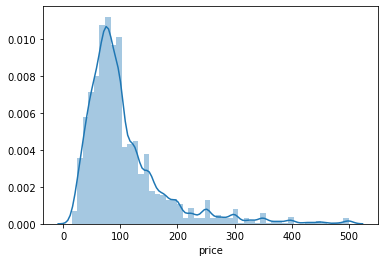

In [9]:
df = df[df['price'] <= 500]
sns.distplot(df['price'])
plt.show()

In [10]:
# split the dataset into train and test

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train, test = train_test_split(df, train_size=0.8, test_size=0.2, random_state=0)
train.shape, test.shape

((6012, 17), (1503, 17))

In [11]:
train, val = train_test_split(train, train_size=0.8, test_size=0.2, random_state=0)
train.shape, val.shape, test.shape

((4809, 17), (1203, 17), (1503, 17))

In [12]:
train.isnull().sum()

room_id                   0
host_id                   0
room_type                 0
address                   0
reviews                   0
overall_satisfaction    948
accommodates              0
bedrooms                  0
bathrooms                 1
price                     0
last_modified             0
latitude                  0
longitude                 0
location                  0
name                      0
currency                  0
rate_type                 0
dtype: int64

In [13]:
# define a function

def wrangle(data):
    '''wrangle data in train, val and test'''
    
    # make a copy 
    data = data.copy()
    
    # replace 0 with np.nan in bedrooms column
    data['bedrooms'] = data['bedrooms'].replace(0, np.NaN)
    
    # drop high unique values for numerical features
    data = data.drop(columns = ['room_id', 'host_id'])
    
    # drop the constant categorical features
    data = data.drop(columns = ['currency', 'rate_type'])
    
    # add mean value where the values are nan in bedroom column
    data['bedrooms'] =  data['bedrooms'].fillna(data['bedrooms'].mean())
    
    # return the wrangle data
    return data

# apply the function to the datasets
train = wrangle(train)
val = wrangle(val)
test = wrangle(test)

In [14]:
# Apply X, y

target = 'price'
features = train.columns.drop([target])

X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]
y_test = test[target]

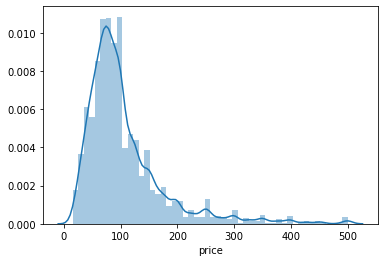

In [15]:
sns.distplot(y_train)

In [16]:
X_train

,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,last_modified,latitude,longitude,location,name
6417,Entire home/apt,Seattle,10,5.0,4,1.000000,1.5,2018-12-20 03:05:54.35251,47.683100,-122.388425,0101000020E6100000B9FC87F4DB985EC0E5F21FD26FD7...,bright townhouse w/fenced patio in ballard
2166,Entire home/apt,Seattle,101,5.0,4,2.000000,1.0,2018-12-20 03:20:34.610472,47.639763,-122.323517,0101000020E6100000CDACA580B4945EC06E1805C1E3D1...,artfully modern 2br in eastlake/lake union
7427,Entire home/apt,Seattle,0,NaN,2,1.000000,1.0,2018-12-20 02:52:58.618997,47.611049,-122.345594,0101000020E610000068EC4B361E965EC073A087DA36CE...,a pike place retreat
1498,Private room,Seattle,64,4.5,3,1.000000,1.5,2018-12-20 03:01:32.173996,47.698496,-122.346044,0101000020E610000088BEBB9525965EC08331225168D9...,"new 1b1b smart townhome, greenwood room #2"
5296,Entire home/apt,Seattle,9,5.0,10,3.000000,2.5,2018-12-20 03:15:57.347842,47.620260,-122.299732,0101000020E6100000246420CF2E935EC02C82FFAD64CF...,"the depot: luxury 3 bed/2.5 bath, great location"
...,...,...,...,...,...,...,...,...,...,...,...,...
3991,Entire home/apt,Seattle,95,5.0,6,2.000000,1.0,2018-12-20 03:46:03.128468,47.613608,-122.307150,0101000020E6100000D93D7958A8935EC03048FAB48ACE...,"comfortable, spacious duplex in walker's parad..."
606,Entire home/apt,Kirkland,82,5.0,4,1.546827,1.0,2018-12-20 02:54:19.744368,47.714169,-122.214882,0101000020E6100000F19F6EA0C08D5EC09468C9E369DB...,charming coastal style cottage
119,Entire home/apt,Seattle,147,5.0,7,2.000000,2.0,2018-12-20 03:23:30.448321,47.622540,-122.317085,0101000020E61000005743E21E4B945EC0D6390664AFCF...,historic seattle home designed for modern living
146,Entire home/apt,Seattle,2,NaN,6,3.000000,2.0,2018-12-20 03:06:33.303136,47.713518,-122.358735,0101000020E61000008E3BA583F5965EC0BD8DCD8E54DB...,spacious house near ballard


In [17]:
# import libraries
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

pipeline = make_pipeline(
    ce.TargetEncoder(),
    SimpleImputer(strategy='median'),
    LinearRegression()
)

# fit the model
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('targetencoder',
                 TargetEncoder(cols=['room_type', 'address', 'last_modified',
                                     'location', 'name'],
                               drop_invariant=False, handle_missing='value',
                               handle_unknown='value', min_samples_leaf=1,
                               return_df=True, smoothing=1.0, verbose=0)),
                ('simpleimputer',
                 SimpleImputer(add_indicator=False, copy=True, fill_value=None,
                               missing_values=nan, strategy='median',
                               verbose=0)),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [18]:
print('Linear Regression R^2:', pipeline.score(X_val, y_val))

Linear Regression R^2: 0.4454537383580302


## Explaining Linear Regression

In [19]:
coefficients = pipeline.named_steps['linearregression'].coef_
pd.Series(coefficients, features)

room_type                0.536186
address                  0.133568
reviews                 -0.116291
overall_satisfaction    14.988400
accommodates             2.733173
bedrooms                28.770928
bathrooms               21.181168
last_modified          -23.446839
latitude                52.825206
longitude              -45.411536
location                 0.511874
name                     0.769234
dtype: float64

In [20]:
from sklearn.metrics import r2_score
from xgboost import XGBRegressor

gb = make_pipeline(
    ce.OrdinalEncoder(), 
    SimpleImputer(strategy='median'),
    XGBRegressor(n_estimators=50, n_jobs=-1)
)

gb.fit(X_train, y_train)
y_pred = gb.predict(X_val)
print('Gradient Boosting R^2', r2_score(y_val, y_pred))

Gradient Boosting R^2 0.38336280484003327


In [21]:
gb.score(X_val, y_val)

0.38336280484003327

In [22]:
plt.rcParams['figure.dpi'] = 72

In [23]:
!pip install pdpbox
!pip install shap

  Using cached shap-0.35.0.tar.gz (273 kB)

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\nirma\Anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\nirma\\AppData\\Local\\Temp\\pip-install-nq08weri\\shap\\setup.py'"'"'; __file__='"'"'C:\\Users\\nirma\\AppData\\Local\\Temp\\pip-install-nq08weri\\shap\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\nirma\AppData\Local\Temp\pip-wheel-prax4x6n'
       cwd: C:\Users\nirma\AppData\Local\Temp\pip-install-nq08weri\shap\
  Complete output (67 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-3.7
  creating build\lib.win-amd64-3.7\shap
  copying shap\common.py -> build\lib.win-amd64-3.7\shap
  copying shap\datasets.py -> build\lib.win-amd64-3.7\shap
  copying shap\__init__.py -> build\lib.win-amd64-3.7\shap
  cr


  Running setup.py clean for shap
Failed to build shap
    Running setup.py install for shap: started
    Running setup.py install for shap: finished with status 'error'



  copying shap\explainers\sampling.py -> build\lib.win-amd64-3.7\shap\explainers
  copying shap\explainers\tf_utils.py -> build\lib.win-amd64-3.7\shap\explainers
  copying shap\explainers\tree.py -> build\lib.win-amd64-3.7\shap\explainers
  copying shap\explainers\__init__.py -> build\lib.win-amd64-3.7\shap\explainers
  creating build\lib.win-amd64-3.7\shap\explainers\other
  copying shap\explainers\other\coefficent.py -> build\lib.win-amd64-3.7\shap\explainers\other
  copying shap\explainers\other\lime.py -> build\lib.win-amd64-3.7\shap\explainers\other
  copying shap\explainers\other\maple.py -> build\lib.win-amd64-3.7\shap\explainers\other
  copying shap\explainers\other\random.py -> build\lib.win-amd64-3.7\shap\explainers\other
  copying shap\explainers\other\treegain.py -> build\lib.win-amd64-3.7\shap\explainers\other
  copying shap\explainers\other\__init__.py -> build\lib.win-amd64-3.7\shap\explainers\other
  creating build\lib.win-amd64-3.7\shap\explainers\deep
  copying shap\

### PDP with one feature

In [25]:
from pdpbox.pdp import pdp_isolate, pdp_plot
feature = 'latitude'

isolated = pdp_isolate(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    feature=feature
)

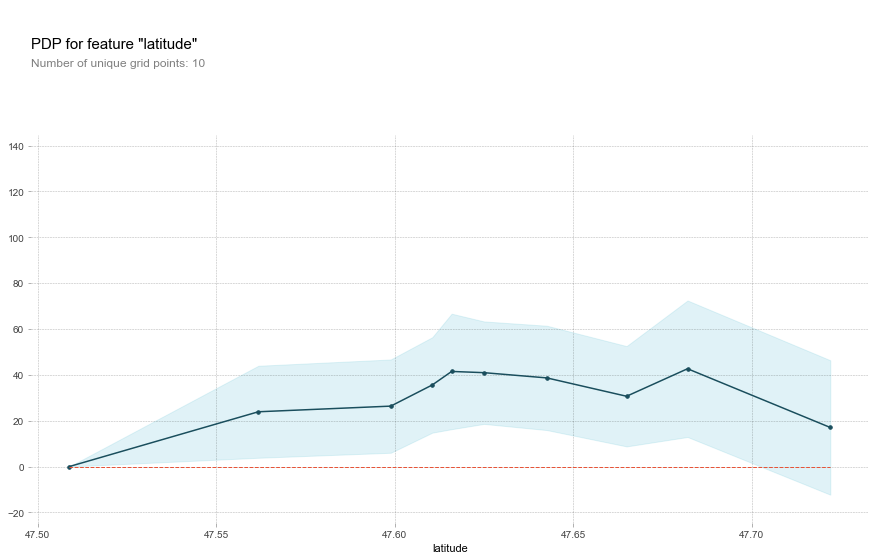

In [26]:
pdp_plot(isolated, feature_name=feature);

### PDP with two features

In [27]:
from pdpbox.pdp import pdp_interact, pdp_interact_plot

In [28]:
features = ['bedrooms', 'latitude']

interaction = pdp_interact(
    model=gb,
    dataset=X_val,
    model_features=X_val.columns,
    features=features
)

(<Figure size 540x684 with 3 Axes>,
 {'title_ax': <matplotlib.axes._subplots.AxesSubplot at 0x193030db048>,
  'pdp_inter_ax': <matplotlib.axes._subplots.AxesSubplot at 0x19303a24a48>})

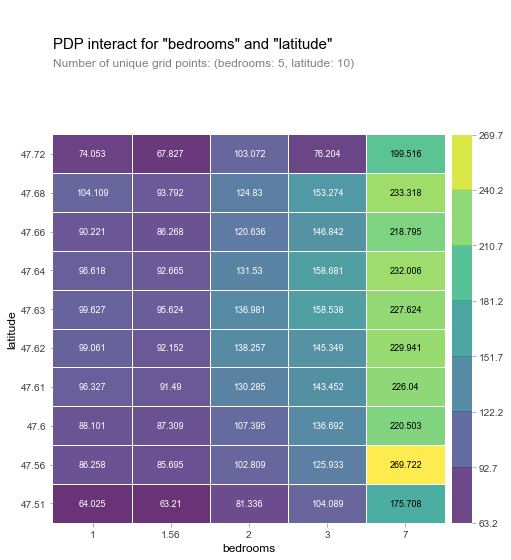

In [30]:
pdp_interact_plot(interaction, plot_type='grid', feature_names=features)

### Shapley plots

In [31]:
df.head()

,room_id,host_id,room_type,address,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,price,last_modified,latitude,longitude,location,name,currency,rate_type
0,2318,2536,Entire home/apt,Seattle,21,5.0,8,4.0,2.5,250,2018-12-20 03:46:14.698548,47.610819,-122.290816,0101000020E6100000D449B6BA9C925EC0416326512FCE...,"casa madrona - urban oasis, 1 block from the p...",USD,nightly
1,3335,4193,Entire home/apt,Seattle,1,NaN,4,2.0,1.0,100,2018-12-20 04:08:45.277643,47.529846,-122.275840,0101000020E61000006FBBD05CA7915EC04DF564FED1C3...,sweet seattle urban homestead 2 bdr,USD,nightly
2,4291,35749,Private room,Seattle,63,4.5,2,1.0,1.0,82,2018-12-20 03:04:19.861014,47.687801,-122.313427,0101000020E6100000BDAB1E300F945EC0FB93F8DC09D8...,sunrise in seattle master suite,USD,nightly
3,5682,8993,Entire home/apt,Seattle,462,5.0,2,0.0,1.0,49,2018-12-20 04:11:25.482975,47.523980,-122.359891,0101000020E6100000FCC7427408975EC009E1D1C611C3...,"cozy studio, min. to downtown -wifi",USD,nightly
4,6606,14942,Entire home/apt,Seattle,134,4.5,2,1.0,1.0,90,2018-12-20 03:12:38.391711,47.654109,-122.337605,0101000020E6100000D47D00529B955EC07782FDD7B9D3...,"fab, private seattle urban cottage!",USD,nightly


In [32]:
train_rf, test_rf = train_test_split(df, train_size=.80, test_size=.20, random_state=0)
train_rf.shape, test_rf.shape

((6012, 17), (1503, 17))

In [33]:
# define a function

def wrangle(data):
    '''wrangle data in train and test'''
    
    # make a copy 
    data = data.copy()
    
    # replace 0 with np.nan in bedrooms column
    data['bedrooms'] = data['bedrooms'].replace(0, np.NaN)
    
    # drop high unique values for numerical features
    data = data.drop(columns = ['room_id', 'host_id'])
    
    # drop the constant categorical features
    data = data.drop(columns = ['currency', 'rate_type'])
    
#     # add mean value where the values are nan in bedroom column
#     data['bedrooms'] =  data['bedrooms'].fillna(data['bedrooms'].mean())
    
    # return the wrangle data
    return data

# apply the function to the datasets
train_rf = wrangle(train_rf)
test_rf = wrangle(test_rf)

In [41]:

# set the target
target_rf = 'price'

# arrange y target vectors
y_train_rf = train_rf[target]
y_test_rf = test_rf[target]

# features selection process
train_features_rf = train_rf.drop([target], axis=1)

# list of nummerical features
numerical_features_rf = train_features_rf.select_dtypes(include='number').columns.to_list()

# categorical features with cardinality
cardinality_rf = train_features_rf.select_dtypes(exclude='number').nunique()

# list of categorical features with cardinality <= 10
categorical_features_rf = cardinality_rf[cardinality_rf <=10].index.to_list()

# combine the list
features_rf = numerical_features_rf + categorical_features_rf
print(features_rf)

['reviews', 'overall_satisfaction', 'accommodates', 'bedrooms', 'bathrooms', 'latitude', 'longitude', 'room_type', 'address']


In [42]:
# Arrange X matrices

X_train_rf = train_rf[features_rf]
X_test_rf = test_rf[features_rf]

In [43]:
# import libraries
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.model_selection import RandomizedSearchCV

pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True),
    SimpleImputer(),
    RandomForestRegressor(random_state=0)
)

param_distributions = {
    'simpleimputer__strategy': ['mean', 'median'],
    'randomforestregressor__n_estimators': randint(100, 400),
    'randomforestregressor__min_samples_leaf': randint(1, 20),
    'randomforestregressor__max_depth': [5, 10, 15,  None],
    'randomforestregressor__max_features': randint(1, 19)
}

search = RandomizedSearchCV(
    pipeline,
    param_distributions=param_distributions,
    n_iter=50,
    cv=5,
    scoring='neg_mean_absolute_error',
    verbose=10,
    random_state=0,
    return_train_score=True,
    n_jobs=-1
)

search.fit(X_train_rf, y_train_rf);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   13.7s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   18.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   24.3s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   26.5s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   45.3s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   51.4s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   56.3s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1

In [45]:
pipeline = search.best_estimator_

In [49]:
row = X_test_rf.iloc[[0]]
row

,reviews,overall_satisfaction,accommodates,bedrooms,bathrooms,latitude,longitude,room_type,address
6487,4,5.0,2,1.0,1.0,47.6255,-122.11822,Private room,Bellevue


In [50]:
y_test_rf.iloc[[0]]

6487    52
Name: price, dtype: int64

In [51]:
pipeline.predict(row)

array([56.61233549])

In [58]:
conda install -c conda-forge shap

Solving environment: ...working... done


Note: you may need to restart the kernel to use updated packages.## Package Plan ##


  environment location: C:\Users\nirma\Anaconda3

  added / updated specs:
    - shap


The following NEW packages will be INSTALLED:

  shap               conda-forge/win-64::shap-0.35.0-py37h3bbf574_0


Preparing transaction: ...working... done
Verifying transaction: ...working... done
Executing transaction: ...working... done


In [59]:
import shap

In [62]:
explainer = shap.TreeExplainer(pipeline)
shap_values = explainer.shap_values(row)

shap_values

SHAPError: Model type not yet supported by TreeExplainer: <class 'sklearn.pipeline.Pipeline'>

In [61]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=row
)

NameError: name 'explainer' is not defined